# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [199]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [200]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [201]:
# Escolhendo duas variáveis numéricas: QTDPARTCES e QTDPARTNOR
# Reduzindo o df para vizualização das colunas de interesse:

sinasc1 = sinasc_raw[['munResLat','QTDPARTCES', 'QTDPARTNOR']]
sinasc1.sample(10)

,munResLat,QTDPARTCES,QTDPARTNOR
10996,-11.72226,0.0,0.0
2764,-10.77388,0.0,0.0
26223,-8.76889,NaN,NaN
19607,-11.67754,1.0,0.0
11001,-11.93554,0.0,1.0
113,-9.90846,1.0,0.0
19157,-10.43595,0.0,0.0
19981,-8.76889,0.0,0.0
16094,-11.52855,0.0,1.0
15588,-11.43387,0.0,0.0


In [202]:
'''def classifica_lat(lat):
    latitude = {}
    if lat >= (-10.5):
        latitude[lat]: 'Acima'
    else: 
        latitude[lat]: 'Abaixo'
    return latitude'''

"def classifica_lat(lat):\n    latitude = {}\n    if lat >= (-10.5):\n        latitude[lat]: 'Acima'\n    else: \n        latitude[lat]: 'Abaixo'\n    return latitude"

In [203]:
# Criando um dicionário com a classificação da latitude (abaixo ou acima de -10.5)

latitude = {}

for l in sinasc1['munResLat']:
    lat = l
    if l >= (-10.5):    
        latitude[lat] = 'Acima'
    else: 
        latitude[lat] = 'Abaixo'

In [204]:
# Colocando a coluna de latitude como Index

sinasc2 = sinasc1.set_index('munResLat')
sinasc2.sample(10)

,QTDPARTCES,QTDPARTNOR
munResLat,,
-9.42556,0.0,0.0
-8.76889,NaN,3.0
-11.43387,1.0,0.0
-9.70554,0.0,0.0
-8.76889,0.0,0.0
-12.74137,0.0,0.0
-10.20981,NaN,1.0
-10.20981,1.0,0.0
-10.24873,0.0,0.0


In [205]:
# testando o mapping

sinasc2.groupby(latitude).count()

,QTDPARTCES,QTDPARTNOR
Abaixo,12840,12825
Acima,12396,12323


In [206]:
# Aplicando soma, media, minimo, maximo, mediana, desvio padrao e variancia para as duas variáveis

sinasc2.groupby(latitude).agg([sum, np.mean, min, max, np.median, np.std, np.var])


QTDPARTCES                                                 QTDPARTNOR  \
              sum      mean  min   max median       std       var        sum   
Abaixo     7095.0  0.552570  0.0  12.0    0.0  0.753036  0.567062     5800.0   
Acima      6041.0  0.487335  0.0  12.0    0.0  0.737899  0.544495     8771.0   

                                                        
            mean  min   max median       std       var  
Abaixo  0.452242  0.0  41.0    0.0  1.123426  1.262087  
Acima   0.711759  0.0  40.0    0.0  1.279042  1.635949

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [207]:
# Criando um subset:

sinasc3 = sinasc_raw[['munResArea','QTDPARTCES', 'QTDPARTNOR']]
sinasc3.sample(10)

,munResArea,QTDPARTCES,QTDPARTNOR
646,4426.571,0.0,0.0
858,4426.571,1.0,1.0
22729,34096.394,1.0,0.0
22810,34096.394,0.0,2.0
4898,8509.270,0.0,0.0
18844,2944.128,0.0,1.0
3058,3135.106,0.0,1.0
3723,6896.648,1.0,0.0
4116,1758.465,0.0,0.0
26240,3265.809,NaN,1.0


In [208]:
# O divisor das categorias será a área de 3000:

areas = {}

for a in sinasc3['munResArea']:
    area = a
    if a >= (3000):    
        areas[a] = 'Maior'
    else: 
        areas[a] = 'Menor'


In [209]:
# Colocando a coluna de áreas como index:

sinasc4 = sinasc3.set_index('munResArea')
sinasc4.sample(10)

,QTDPARTCES,QTDPARTNOR
munResArea,,
11518.915,2.0,0.0
34096.394,1.0,0.0
24855.724,0.0,2.0
7067.025,0.0,1.0
798.083,1.0,0.0
34096.394,0.0,0.0
24855.724,0.0,0.0
2651.822,0.0,2.0
1457.888,0.0,0.0


In [210]:
# Aplicando soma, media, minimo, maximo, mediana, desvio padrao e variancia para as duas variáveis

sinasc4.groupby(areas).agg([sum, np.mean, min, max, np.median, np.std, np.var])

QTDPARTCES                                                 QTDPARTNOR  \
             sum      mean  min   max median       std       var        sum   
Maior    10184.0  0.507070  0.0  12.0    0.0  0.744981  0.554997    12659.0   
Menor     2952.0  0.572981  0.0   5.0    0.0  0.749368  0.561553     1912.0   

                                                       
           mean  min   max median       std       var  
Maior  0.632982  0.0  41.0    0.0  1.278932  1.635668  
Menor  0.371334  0.0  10.0    0.0  0.856441  0.733490

In [211]:
# Alternativamente, poderia ser criada uma função para os dois exercícios

def categoriza(x): # Eu conseguiria adicionar o limite (3000, nesse caso) como uma variável da função?
    dicio = {}
    
    if x >= (3000):    
        dicio[x] = 'Acima'
    else: 
        dicio[x] = 'Abaixo'
    return dicio

x = list(map(categoriza, sinasc3['munResArea']))


### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [212]:
# Criando um subset:

sinasc5 = sinasc_raw[['munResAlt','QTDPARTCES', 'QTDPARTNOR']]
sinasc5.sample(10)



,munResAlt,QTDPARTCES,QTDPARTNOR
12236,595.0,3.0,0.0
11010,177.0,1.0,0.0
7692,87.0,0.0,0.0
9397,87.0,NaN,NaN
16183,263.0,0.0,2.0
15424,266.0,0.0,2.0
16016,145.0,0.0,3.0
13358,145.0,1.0,0.0
26851,87.0,2.0,0.0
5869,186.0,1.0,0.0


In [213]:
# Definindo um valor limite:
sinasc5['munResAlt'].mean()
sinasc5['munResAlt'].max()
sinasc5['munResAlt'].min()

85.0

#### Se forem duas faixas:

In [214]:
# Como a média é 179.1, a máxima 595 e a mínima 85, vou definir o limite como 160: 

altitudes = {}

for a in sinasc5['munResAlt']:
    if a >= (160):    
        altitudes[a] = 'Maior'
    else: 
        altitudes[a] = 'Menor'
        

In [215]:
# Colocando a coluna de altitude como index:

sinasc6 = sinasc5.set_index('munResAlt')
sinasc6.sample(10)

,QTDPARTCES,QTDPARTNOR
munResAlt,,
177.0,0.0,2.0
595.0,0.0,2.0
139.0,0.0,0.0
87.0,NaN,NaN
87.0,0.0,1.0
227.0,0.0,0.0
157.0,1.0,1.0
87.0,0.0,0.0
128.0,0.0,0.0


In [216]:
# Aplicando soma, media, minimo, maximo, mediana, desvio padrao e variancia para as duas variáveis

sinasc6.groupby(altitudes).agg([sum, np.mean, min, max, np.median, np.std, np.var])

QTDPARTCES                                                 QTDPARTNOR  \
             sum      mean  min   max median       std       var        sum   
Maior     6210.0  0.579670  0.0   5.0    0.0  0.741913  0.550434     4067.0   
Menor     6926.0  0.476899  0.0  12.0    0.0  0.746612  0.557430    10504.0   

                                                       
           mean  min   max median       std       var  
Maior  0.380236  0.0  41.0    0.0  1.034812  1.070835  
Menor  0.726820  0.0  40.0    0.0  1.304074  1.700608

#### Se forem 3 faixas:

Definindo faixas de altitude arbitrárias:
 - de 85 a 160, 
 - de 160 a 300, 
 - de 300 a 595

In [217]:
# Fazendo a categorização:

altitudes2 = {}

for a in sinasc5['munResAlt']:
    if a < (160):    
        altitudes2[a] = 'Abaixo de 160'
    elif a >= 300:
        altitudes2[a] = 'Acima de 300'
    else: 
        altitudes2[a] = 'Entre 160 e 300'

In [218]:
#Aplicando as operações:

sinasc6.groupby(altitudes2).agg([sum, np.mean, min, max, np.median, np.std, np.var])

QTDPARTCES                                                  \
                       sum      mean  min   max median       std       var   
Abaixo de 160       6926.0  0.476899  0.0  12.0    0.0  0.746612  0.557430   
Acima de 300        1411.0  0.571255  0.0   4.0    0.0  0.752196  0.565800   
Entre 160 e 300     4799.0  0.582191  0.0   5.0    0.0  0.738831  0.545871   

                QTDPARTNOR                                                  
                       sum      mean  min   max median       std       var  
Abaixo de 160      10504.0  0.726820  0.0  40.0    0.0  1.304074  1.700608  
Acima de 300         868.0  0.351559  0.0   9.0    0.0  0.872051  0.760473  
Entre 160 e 300     3199.0  0.388842  0.0  41.0    0.0  1.078777  1.163761

In [219]:
# Mais fácil que o for, eu poderia ter usado o cut:

altitudes3 = pd.cut(sinasc5['munResAlt'],[85,160,300,595])


In [220]:
sinasc5.pivot_table(values='QTDPARTCES',
                   index = [altitudes3])

,QTDPARTCES
munResAlt,
"(85, 160]",0.477151
"(160, 300]",0.582191
"(300, 595]",0.571255


### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [265]:
# Para os próximos exercícios, vou usar um df adicional com os dados necessários (de região, idh, pib e ifdm):

dados_extras = pd.read_csv('dados_extras_ro.csv', sep=';', encoding='latin_1')
dados_extras.sample(10)

,municipio,regiao,idh,ifdm,pib
47,Theobroma,Jaru,0.589,0.5405,140601
50,Vale do Paraíso,Ji-Paraná,0.627,0.5818,116742
16,Costa Marques,Ji-Paraná,0.611,0.5626,171878
46,Teixeirópolis,Ji-Paraná,0.643,0.6500,72089
13,Chupinguaia,Vilhena,0.652,0.6766,190331
26,Mirante da Serra,Ji-Paraná,0.643,0.5519,163955
7,Cacaulândia,Ariquemes,0.646,0.5721,116635
43,São Francisco do Guaporé,Ji-Paraná,0.611,0.6214,353000
22,Jaru,Jaru,0.689,0.6450,1500890
42,São Felipe D'Oeste,Cacoal,0.649,0.6153,72084


In [266]:
# Criando um subset com os dois dfs combinados

dados_ro = dados_extras.set_index('municipio')
sinasc_ro = sinasc_raw[['munResNome','DTNASC','IDADEMAE', 'IDADEPAI', 'QTDFILVIVO', 'PESO']]

df_unido = pd.merge(sinasc_ro, dados_ro, left_on='munResNome', right_index=True)
df_unido.sample(10)

,munResNome,DTNASC,IDADEMAE,IDADEPAI,QTDFILVIVO,PESO,regiao,idh,ifdm,pib
5927,Pimenta Bueno,2019-06-13,15,23.0,0.0,3425,Cacoal,0.710,0.7383,1164877
13656,Porto Velho,2019-02-22,25,NaN,NaN,3095,Porto Velho,0.736,0.7257,17912070
5297,Ouro Preto do Oeste,2019-03-22,19,21.0,0.0,3950,Ji-Paraná,0.682,0.6261,834000
4400,Ji-Paraná,2019-05-12,23,NaN,1.0,3900,Ji-Paraná,0.714,0.7117,3783972
12475,Vilhena,2019-06-25,25,NaN,0.0,2695,Vilhena,0.731,0.7465,2831175
18631,Nova Brasilândia D'Oeste,2019-09-07,21,NaN,0.0,3040,Cacoal,0.643,0.5857,360000
6597,Porto Velho,2019-02-15,35,NaN,0.0,3355,Porto Velho,0.736,0.7257,17912070
11122,Rolim de Moura,2019-04-11,36,39.0,1.0,3830,Cacoal,0.700,0.6785,1283434
5534,Ouro Preto do Oeste,2019-06-07,19,NaN,0.0,3105,Ji-Paraná,0.682,0.6261,834000
2404,Espigão D'Oeste,2019-02-28,25,NaN,2.0,3780,Cacoal,0.672,0.5973,625000


In [273]:
# Filtrando as regiões imediatas

cacoal = df_unido[df_unido['regiao'] == 'Cacoal'].groupby('DTNASC')['IDADEMAE'].mean()
portovelho = df_unido[df_unido['regiao'] == 'Porto Velho'].groupby('DTNASC')['IDADEMAE'].mean()
jiparana = df_unido[df_unido['regiao'] == 'Ji-Paraná'].groupby('DTNASC')['IDADEMAE'].mean()
ariquemes = df_unido[df_unido['regiao'] == 'Ariquemes'].groupby('DTNASC')['IDADEMAE'].mean()
vilhena = df_unido[df_unido['regiao'] == 'Vilhena'].groupby('DTNASC')['IDADEMAE'].mean()
jaru = df_unido[df_unido['regiao'] == 'Jaru'].groupby('DTNASC')['IDADEMAE'].mean()

Text(0, 0.5, 'média da idade da mãe')

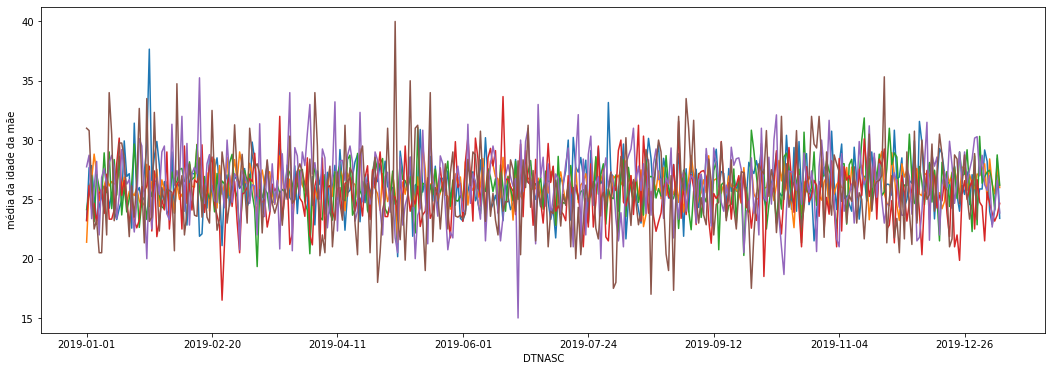

In [278]:
# Plotando todas no mesmo gráfico

cacoal.plot(figsize=[18,6])
portovelho.plot()
jiparana.plot()
ariquemes.plot()
vilhena.plot()
jaru.plot()

plt.ylabel('média da idade da mãe')

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


- IDH-M Alto
- IDH-M Médio
- IDH-M Baixo

In [279]:
# Ainda usando o df criado no exercício anterior:
idh = {}

for x in df_unido['idh']:
    if x <= 0.599:    
        idh[x] = 'IDH baixo'
    elif x > 0.7:
        idh[x] = 'IDH alto'
    else: 
        idh[x] = 'IDH médio'


In [281]:
df_unido_idh = df_unido.set_index('idh')

df_unido_idh.groupby(idh).mean()

,IDADEMAE,IDADEPAI,QTDFILVIVO,PESO,ifdm,pib
IDH alto,26.261678,31.236319,1.044870,3246.914553,0.730394,1.080914e+07
IDH baixo,25.326944,30.617450,1.072664,3231.456188,0.528481,3.782186e+05
IDH médio,25.956433,31.004303,1.065183,3239.107948,0.614895,6.523018e+05


### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


- Alto, resultados superiores a 0,8 pontos;
- Moderado, resultados entre 0,6 e 0,8 pontos;
- Regular, resultados entre 0,4 e 0,6 pontos;
- Baixo, resultados inferiores a 0,4 pontos;

In [287]:
ifdm = {}

for x in df_unido['ifdm']:
    if x < 0.4:    
        ifdm[x] = 'Desenvolvimento baixo'
        
    elif x >= 0.4 and x < 0.6:
        ifdm[x] = 'Desenvolvimento regular'
        
    elif x >= 0.6 and x <= 0.8:
        ifdm[x] = 'Desenvolvimento moderado'
        
    else: 
        ifdm[x] = 'Desenvolvimento alto'
        

In [288]:
df_unido_ifdm = df_unido.set_index('ifdm')

df_unido_ifdm.groupby(ifdm).mean()

,IDADEMAE,IDADEPAI,QTDFILVIVO,PESO,idh,pib
Desenvolvimento moderado,26.223139,31.061687,1.027298,3243.420532,0.708615,8.055108e+06
Desenvolvimento regular,25.535131,31.237509,1.164372,3242.203306,0.623995,4.191980e+05


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


- Acima de 1 Bilhão
- Acima de 500 Milhões
- Acima de 300 Milhões
- Acima de 200 Milhões
- Acima de 100 Milhões
- Até 100 Milhões


In [291]:
pib = {}

for x in df_unido['pib']:
    if x <= 100000:    
        pib[x] = 'Até 100 milhões'
        
    elif x > 100000 and x <= 200000:
        pib[x] = 'Acima de 100 milhões'
        
    elif x > 200000 and x <= 300000:
        pib[x] = 'Acima de 200 milhões'
    
    elif x > 300000 and x <= 500000:
        pib[x] = 'Acima de 300 milhões'
    
    elif x > 500000 and x <= 1000000:
        pib[x] = 'Acima de 500 milhões'
        
    else: 
        pib[x] = 'Acima de 1 bilhão'


In [292]:
df_unido_pib = df_unido.set_index('pib')

df_unido_pib.groupby(pib).mean()

,IDADEMAE,IDADEPAI,QTDFILVIVO,PESO,idh,ifdm
Acima de 1 bilhão,26.265562,31.108387,1.026435,3247.215719,0.723017,0.723440
Acima de 100 milhões,25.662910,31.602102,1.001561,3248.526639,0.621772,0.582366
Acima de 200 milhões,25.323204,30.386441,1.000000,3231.439227,0.610793,0.561162
Acima de 300 milhões,25.833511,30.183386,0.996774,3225.818617,0.640085,0.602200
Acima de 500 milhões,25.782528,31.322907,1.234191,3239.456087,0.642966,0.588886
Até 100 milhões,26.515081,31.585185,1.000000,3186.264501,0.630541,0.603143


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

- A idade média tanto da mãe quando do pai é maior quanto maior o IDH
- Em cidades com o IFDM menor, as mulheres têm mais filhos, em média; o mesmo acontece para o IDH